# ECO904 - Atividade 1 - Etapa 1 - Análise da Base de Dados

- Características dos atributos
- Dados faltantes
- Correlação
- Histogramas
- Detectando anomalias nos dados

## Carregando banco de dados

In [4]:
from gdown import download
import zipfile
import os
# Download do arquivo do Google Drive
arquivo = 'dataset.zip'
url = 'https://drive.google.com/file/d/17XOsLTMn3B2F9odJxGysu0J8rW9tJj6S/view?usp=sharing'
download(url,fuzzy=True,output=arquivo)
# Descompacta o arquivo
with zipfile.ZipFile(arquivo, 'r') as zip_ref:
    zip_ref.extractall('./')
# Remove o arquivo zipado
os.remove(arquivo)

Downloading...
From: https://drive.google.com/uc?id=17XOsLTMn3B2F9odJxGysu0J8rW9tJj6S
To: c:\Repositorio Offline\ECO904-2024\ECO904\2024-1\Atividade_1\dataset.zip
100%|██████████| 17.5M/17.5M [00:02<00:00, 6.34MB/s]


In [5]:
import pandas as pd
df = pd.read_csv('base2024_classificacao.csv')
df.head()

,dispositivo_1,dispositivo_2,dispositivo_3,dispositivo_4,dispositivo_5,dispositivo_6,dispositivo_7,dispositivo_8,dispositivo_9,dispositivo_10,...,dispositivo_42,dispositivo_43,dispositivo_44,dispositivo_45,dispositivo_46,dispositivo_47,dispositivo_48,dispositivo_49,dispositivo_50,falha
0,73.18,61.70,44.79,34.70,64.35,31.37,71.95,46.84,45.40,57.63,...,57.50,49.11,35.51,49.83,35.35,56.37,56.21,50.41,42.17,0
1,48.70,36.58,42.64,51.02,66.17,43.68,51.84,57.06,40.92,33.10,...,42.58,45.03,55.41,56.54,34.13,50.11,49.88,49.82,69.11,0
2,45.65,69.17,48.58,34.39,42.41,41.61,59.15,55.03,59.03,59.72,...,74.03,48.05,39.78,58.47,63.05,54.80,68.53,45.07,71.07,0
3,63.11,49.81,38.17,59.98,61.59,59.39,48.50,55.62,52.20,30.47,...,43.08,47.89,32.30,66.46,54.78,60.01,21.40,53.12,50.01,0
4,28.41,38.22,43.15,39.12,58.32,71.58,36.61,45.84,35.68,45.38,...,58.20,55.04,36.48,52.88,54.85,66.86,50.58,58.64,53.66,0


## Características dos atributos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172800 entries, 0 to 172799
Data columns (total 51 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dispositivo_1   172800 non-null  float64
 1   dispositivo_2   172800 non-null  float64
 2   dispositivo_3   172800 non-null  float64
 3   dispositivo_4   172800 non-null  float64
 4   dispositivo_5   172800 non-null  float64
 5   dispositivo_6   172800 non-null  float64
 6   dispositivo_7   172800 non-null  float64
 7   dispositivo_8   172800 non-null  float64
 8   dispositivo_9   172800 non-null  float64
 9   dispositivo_10  172800 non-null  float64
 10  dispositivo_11  172800 non-null  float64
 11  dispositivo_12  172800 non-null  float64
 12  dispositivo_13  172800 non-null  float64
 13  dispositivo_14  172800 non-null  float64
 14  dispositivo_15  172800 non-null  float64
 15  dispositivo_16  172800 non-null  float64
 16  dispositivo_17  172800 non-null  float64
 17  dispositiv

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dispositivo_1,172800.0,46.327782,11.225765,0.00,38.7000,46.350,53.8900,100.00
dispositivo_2,172800.0,52.965991,11.829708,0.00,45.0100,52.970,60.9600,99.85
dispositivo_3,172800.0,47.514535,10.499884,0.00,40.4600,47.530,54.5900,100.00
dispositivo_4,172800.0,46.026697,10.348430,0.00,39.0600,46.020,53.0100,89.99
dispositivo_5,172800.0,48.915544,11.086735,0.00,41.6000,49.190,56.4600,100.00
dispositivo_6,172800.0,49.140180,11.231233,0.00,41.5700,49.150,56.7200,100.00
dispositivo_7,172800.0,49.971079,10.969481,0.00,42.5700,49.960,57.4100,96.39
dispositivo_8,172800.0,49.727014,11.300629,0.62,42.0700,49.710,57.3400,100.00
dispositivo_9,172800.0,50.511761,11.721302,0.00,42.6100,50.480,58.4100,100.00
dispositivo_10,172800.0,49.144659,10.726565,0.00,41.8700,49.170,56.3900,100.00


Detalhes da base nesta primeira análise:
- Não tem dados faltantes, pois a contagem de valores não nulos (COUNT) está completo para todos os dispositivos e alvo (falha);
- A distribuição das leituras dos dispositivos é muito similar, pois os valores máximos, mínimos, desvio padrão e médias são quase todos idênticos;
- A falha parece ser bem distribuída entre norma e falha pela média de 0.5.

## Correlação

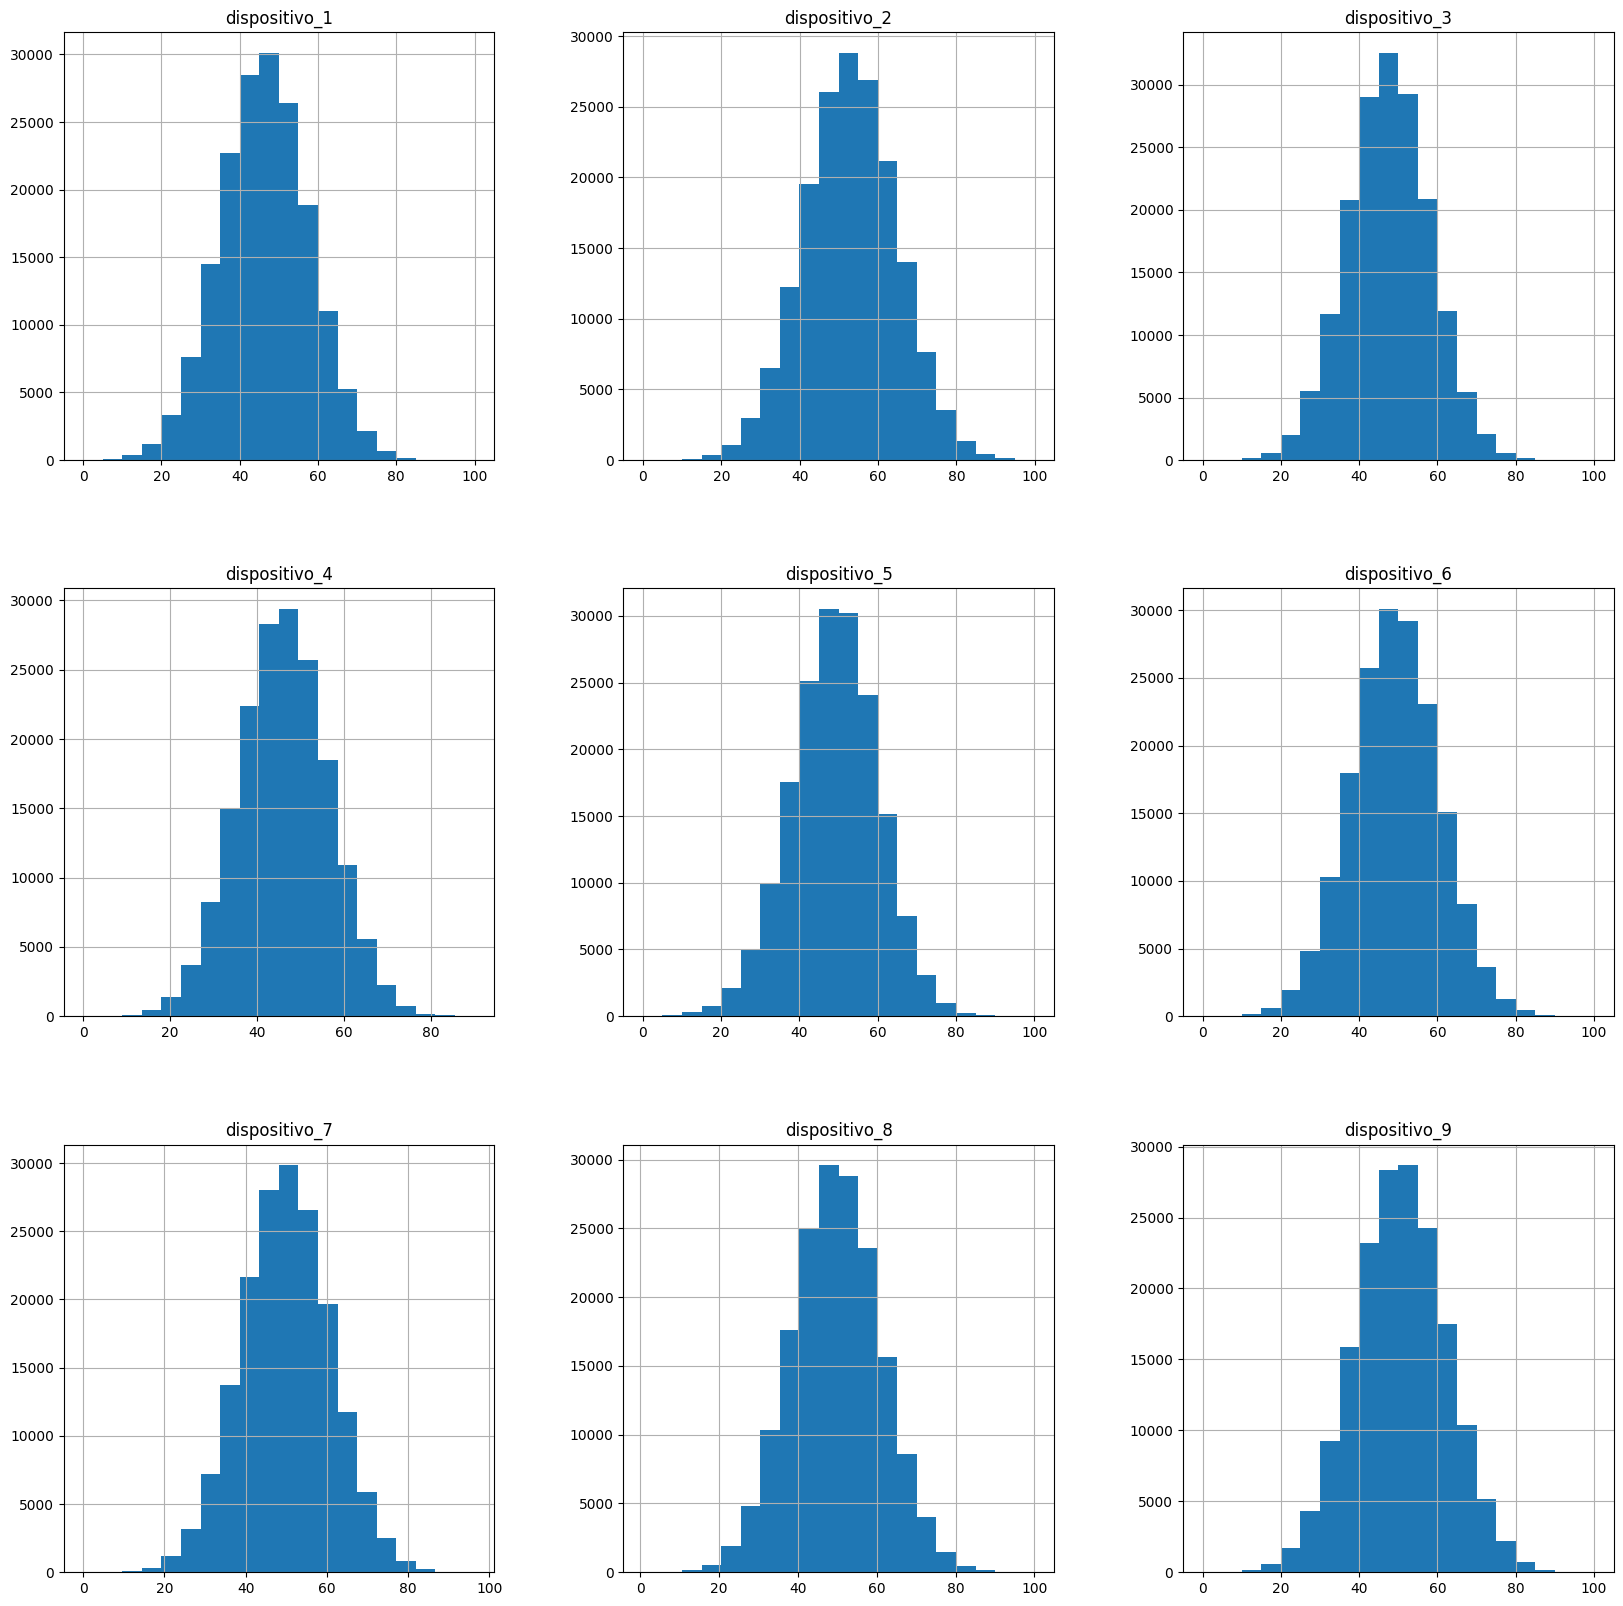

In [5]:
# Análise de histograma dos atributos
_ = df.hist(column=df.columns[:9], figsize=(20, 20), bins=20)

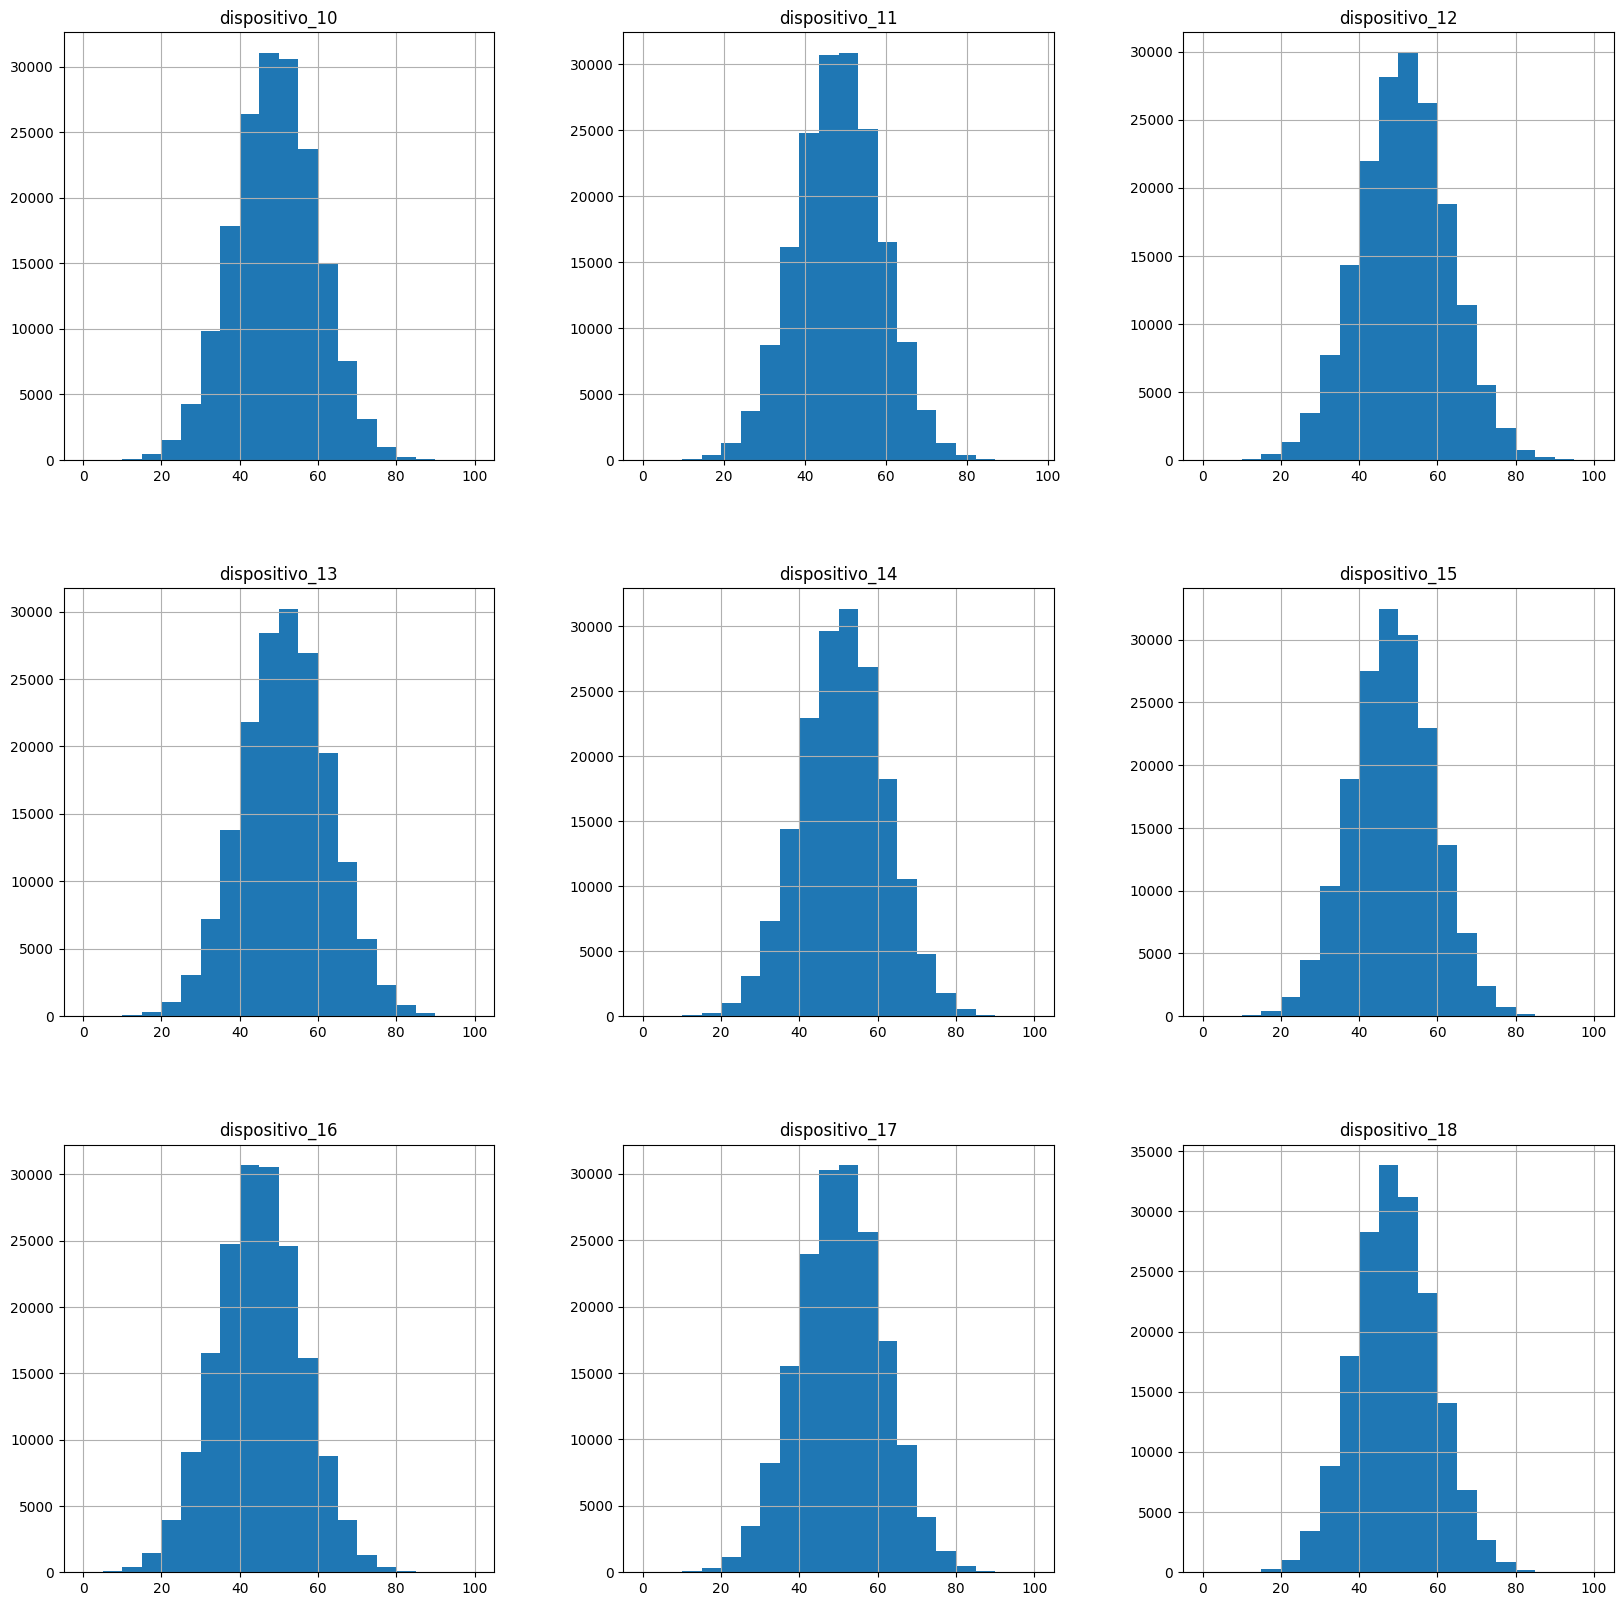

In [6]:
# Análise de histograma dos atributos
_ = df.hist(column=df.columns[9:18], figsize=(20, 20), bins=20)

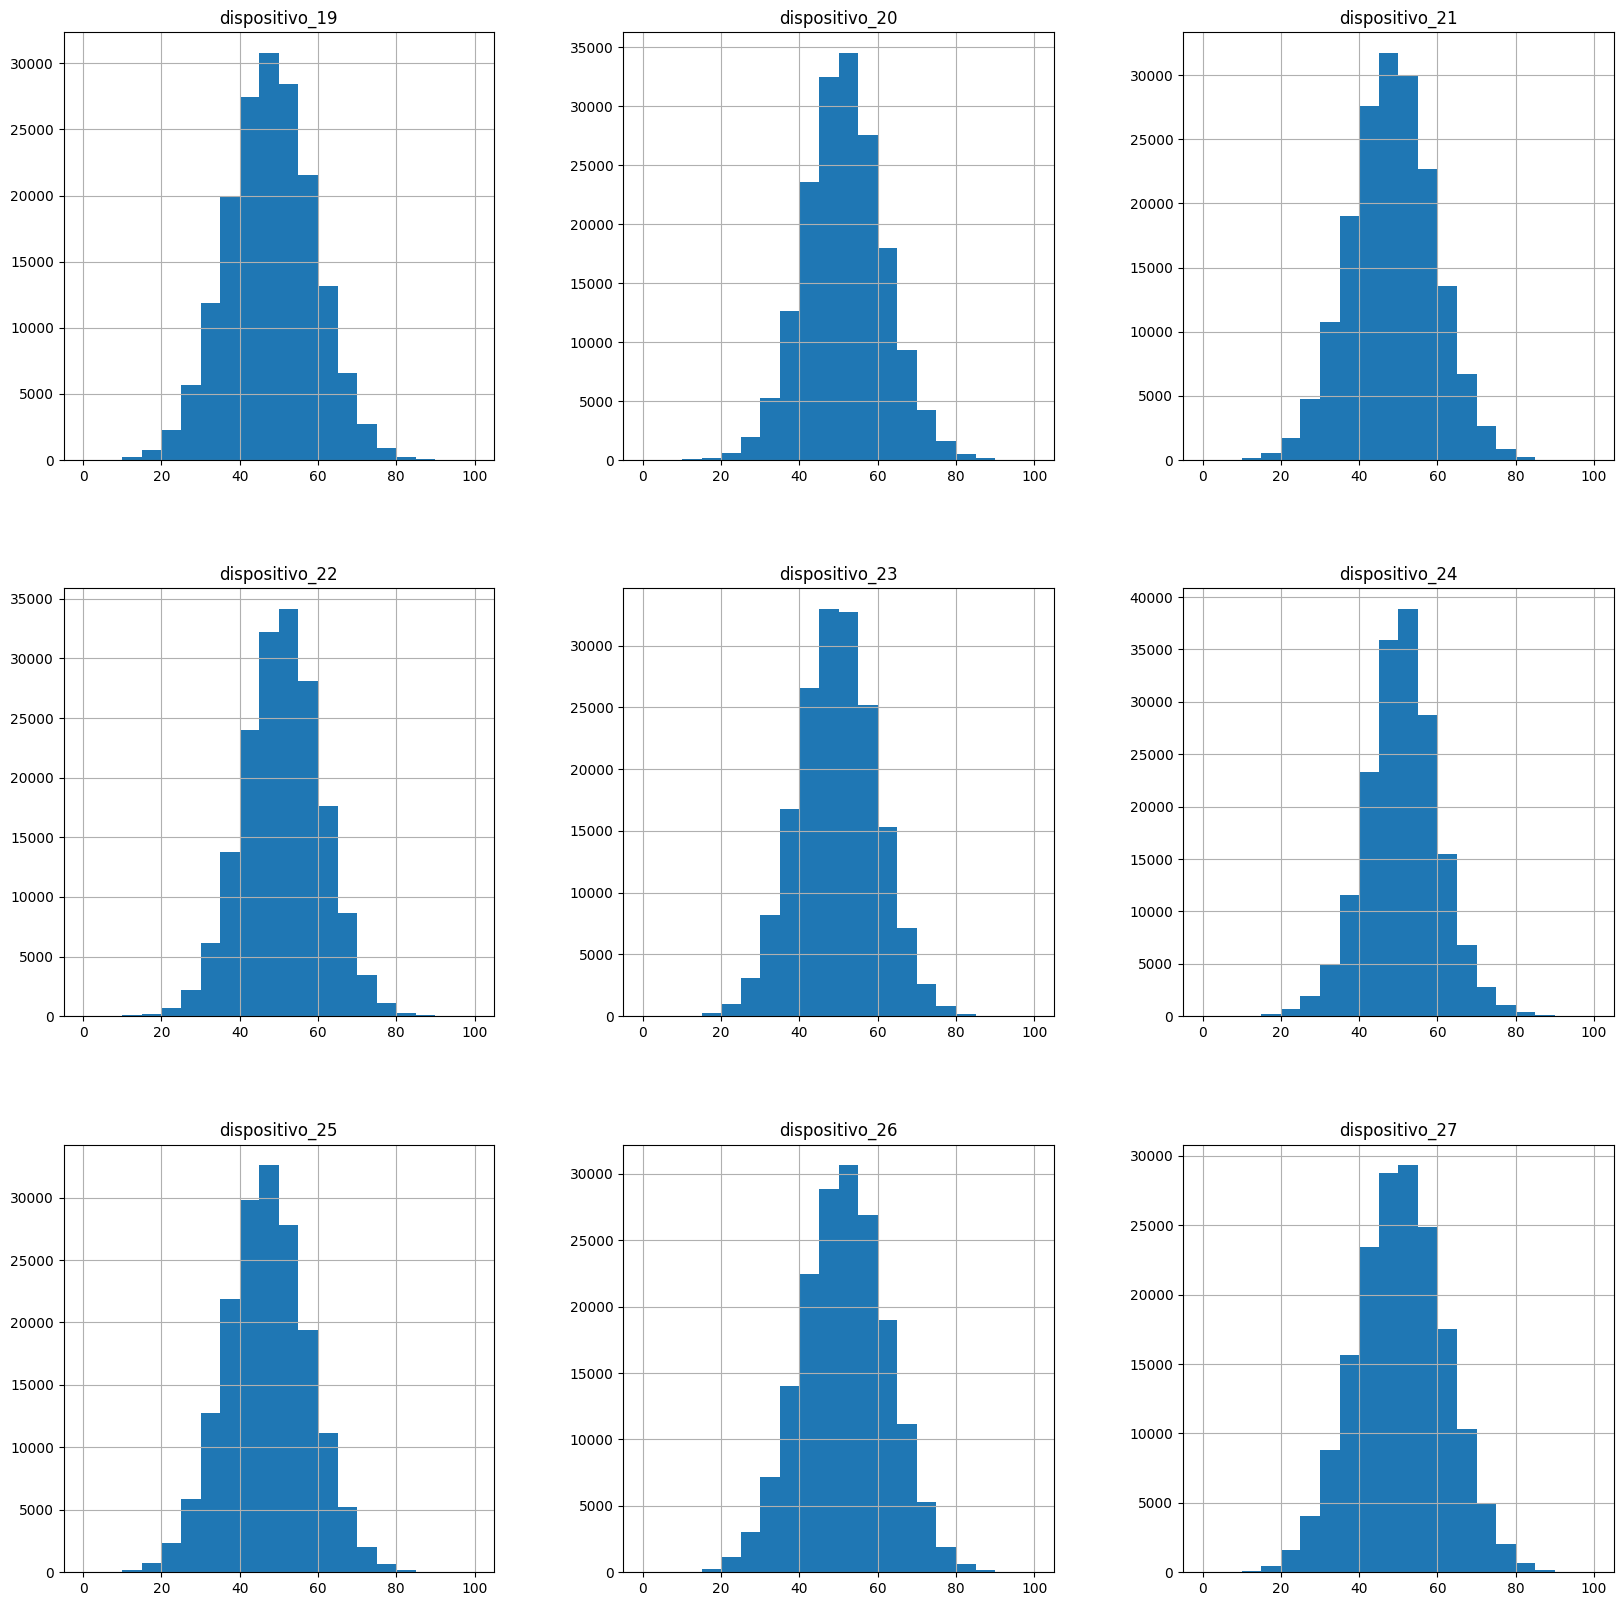

In [7]:
# Análise de histograma dos atributos
_ = df.hist(column=df.columns[18:27], figsize=(20, 20), bins=20)

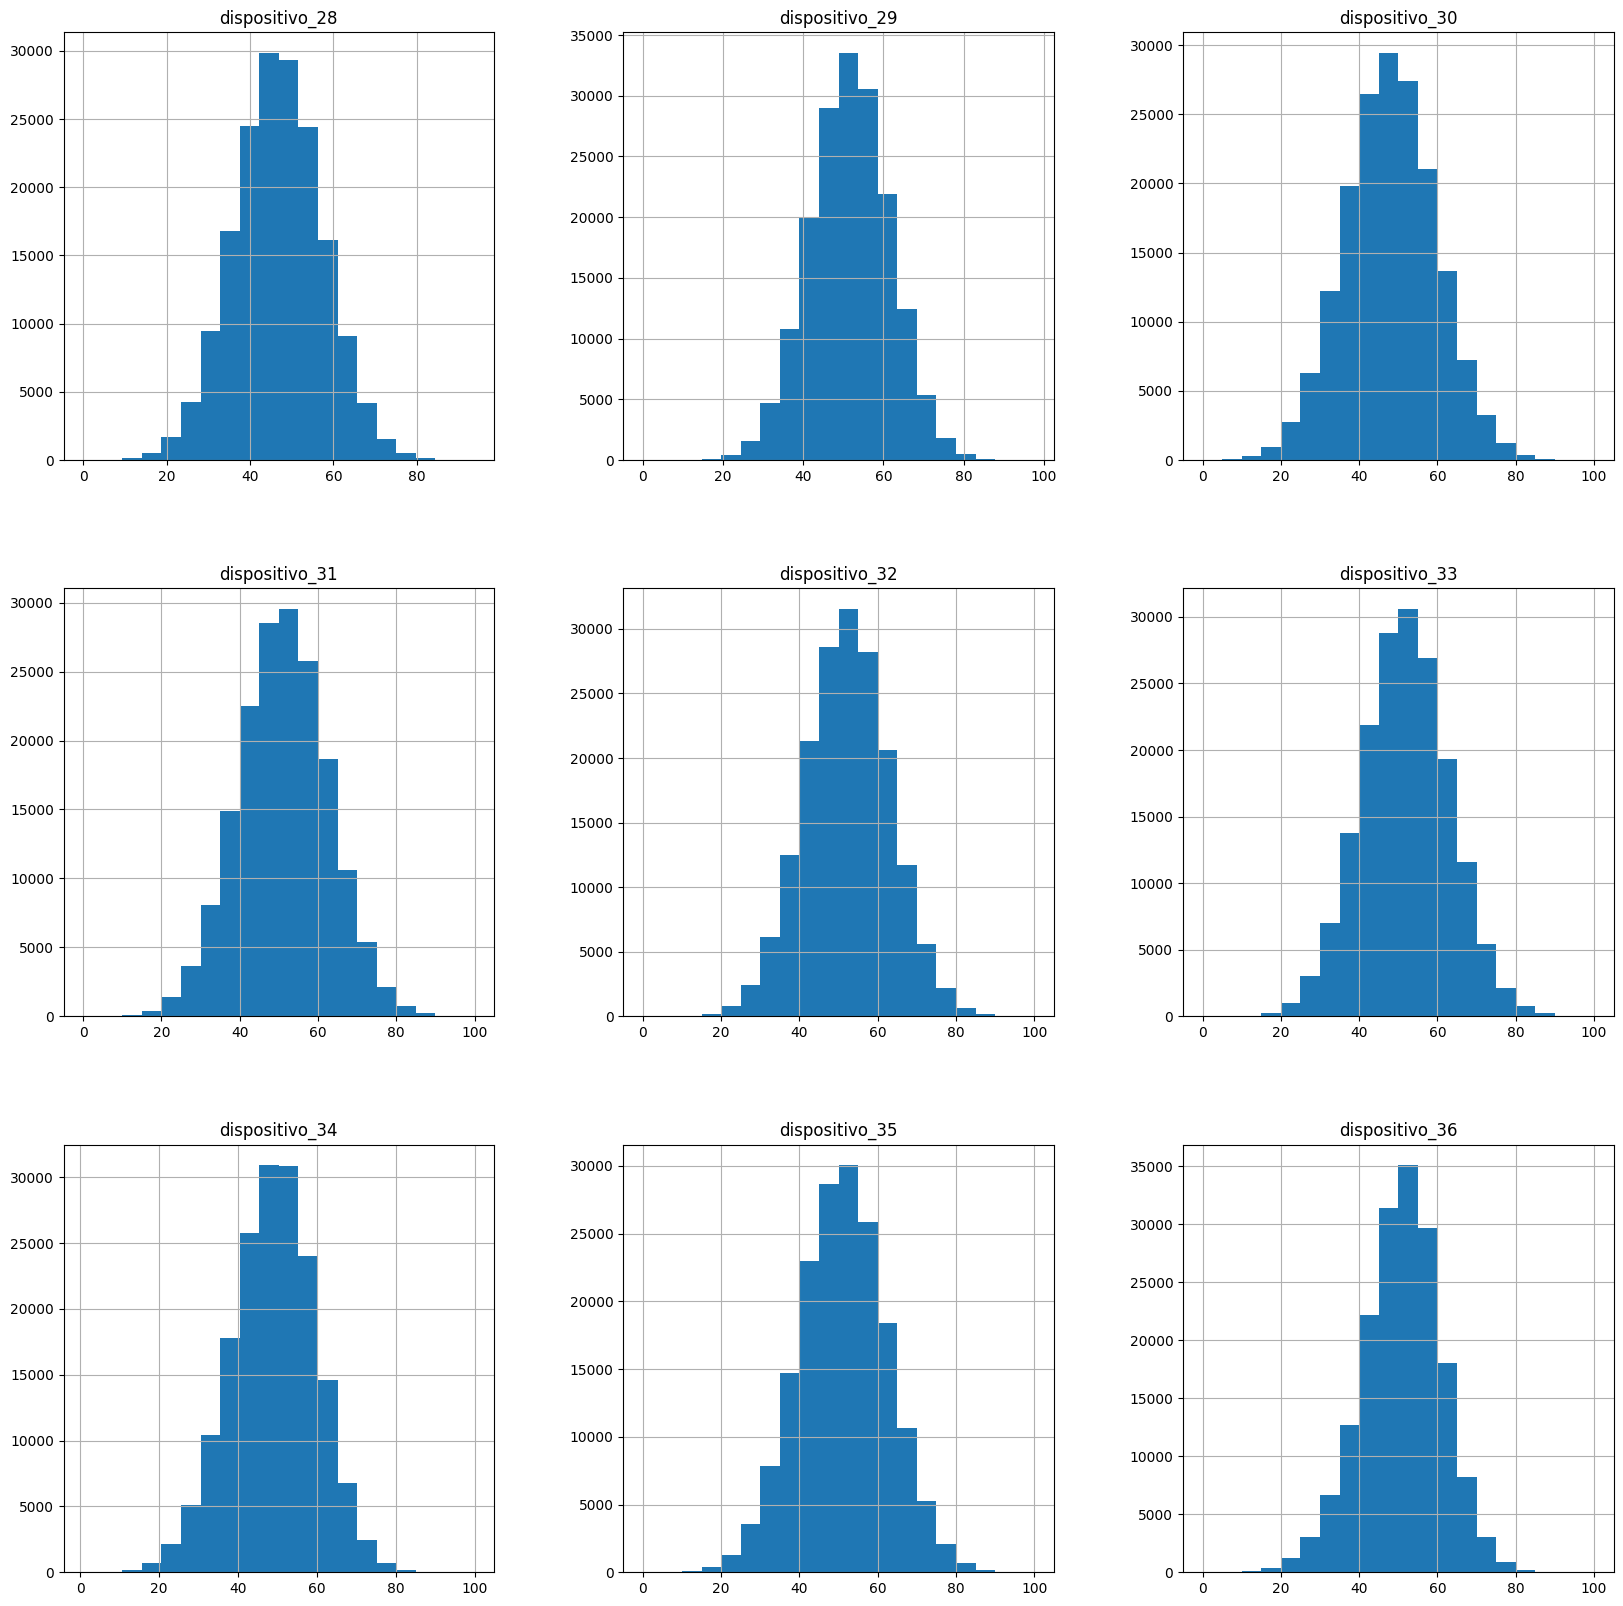

In [8]:
# Análise de histograma dos atributos
_ = df.hist(column=df.columns[27:36], figsize=(20, 20), bins=20)

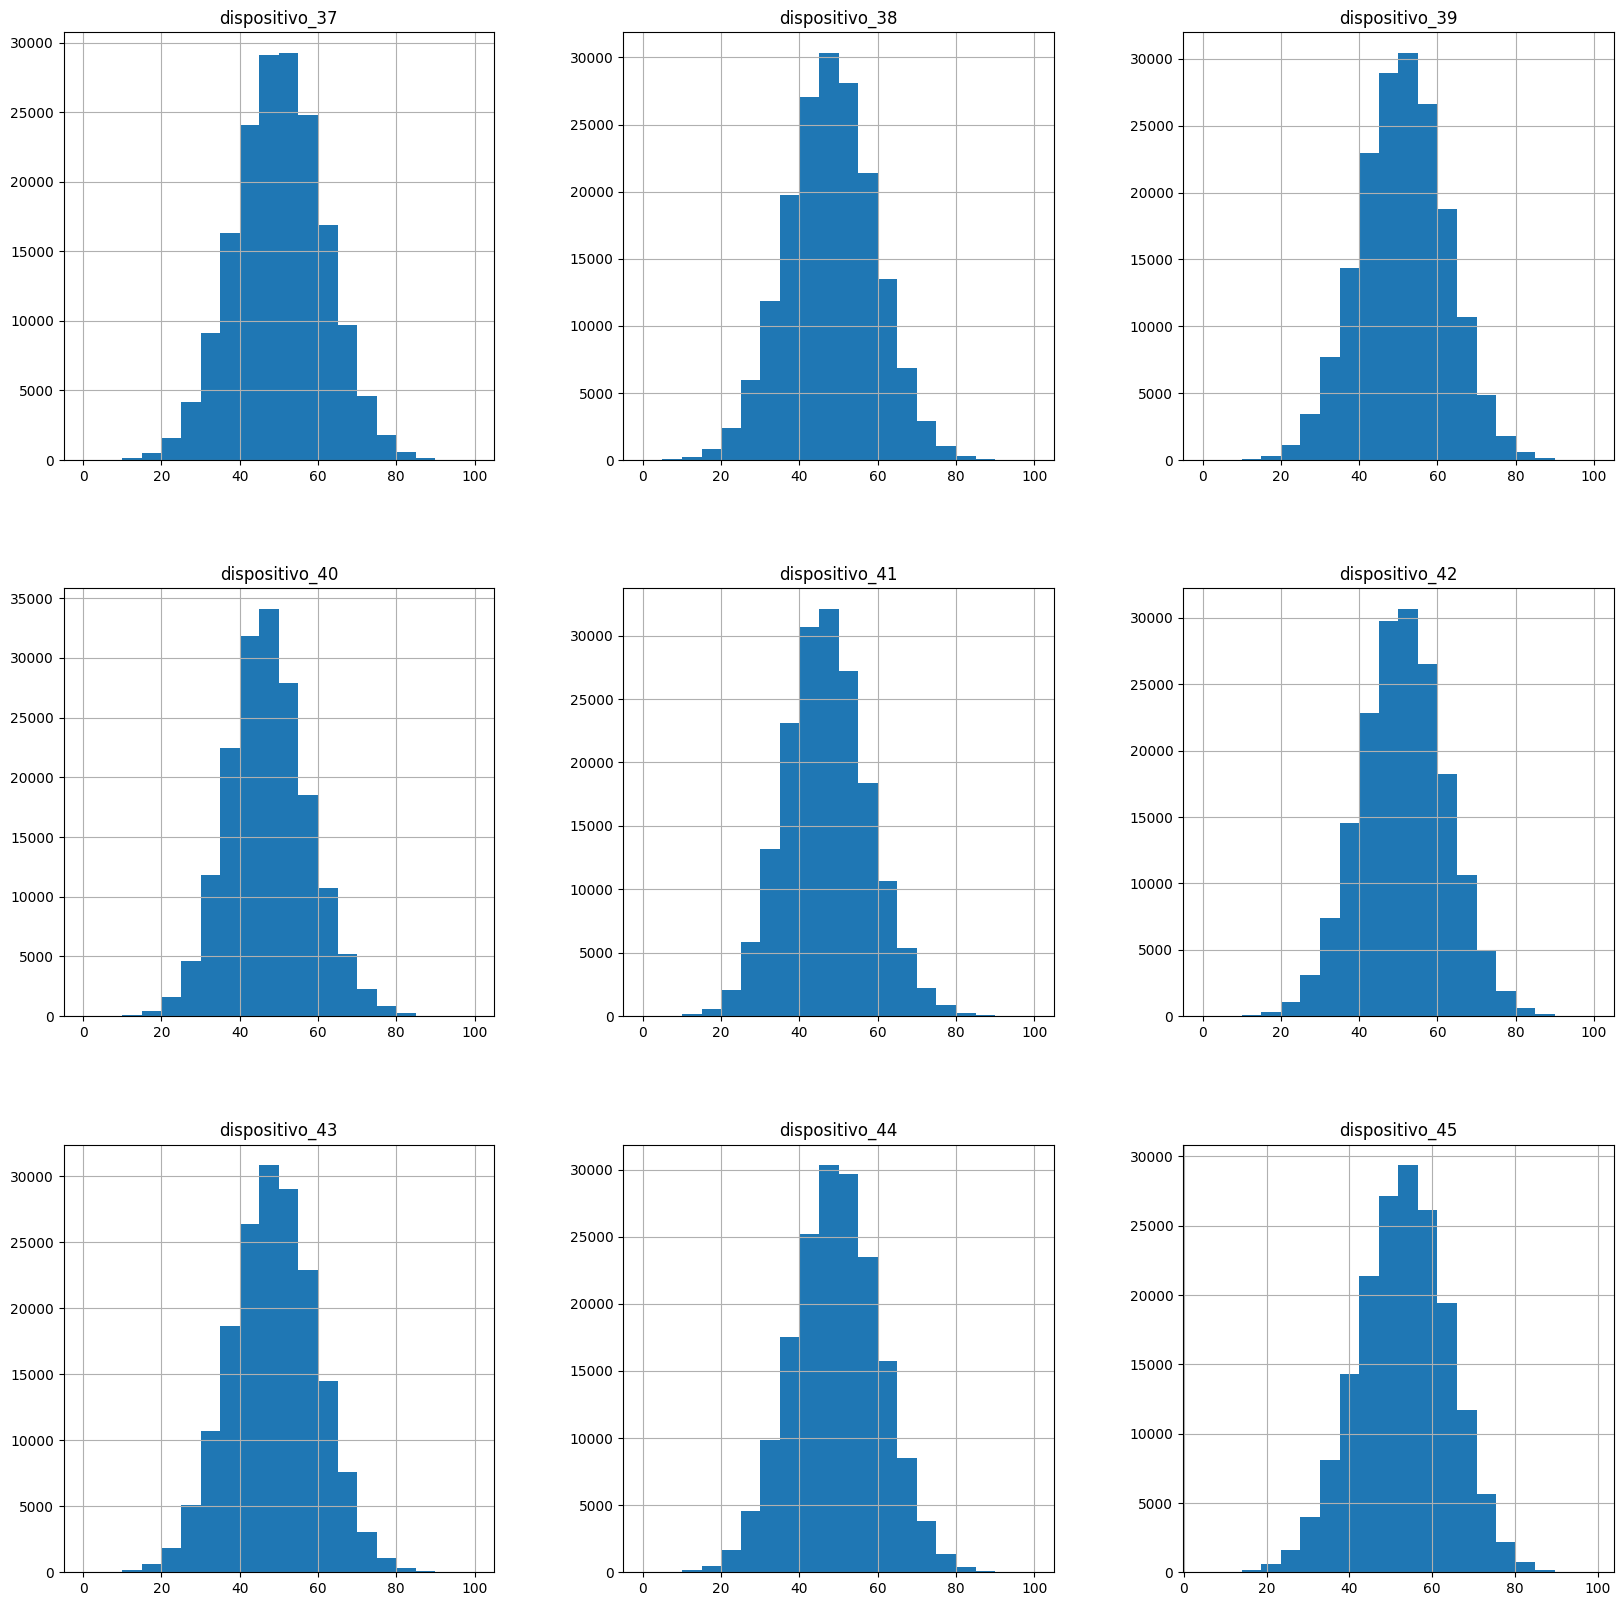

In [9]:
# Análise de histograma dos atributos
_ = df.hist(column=df.columns[36:45], figsize=(20, 20), bins=20)

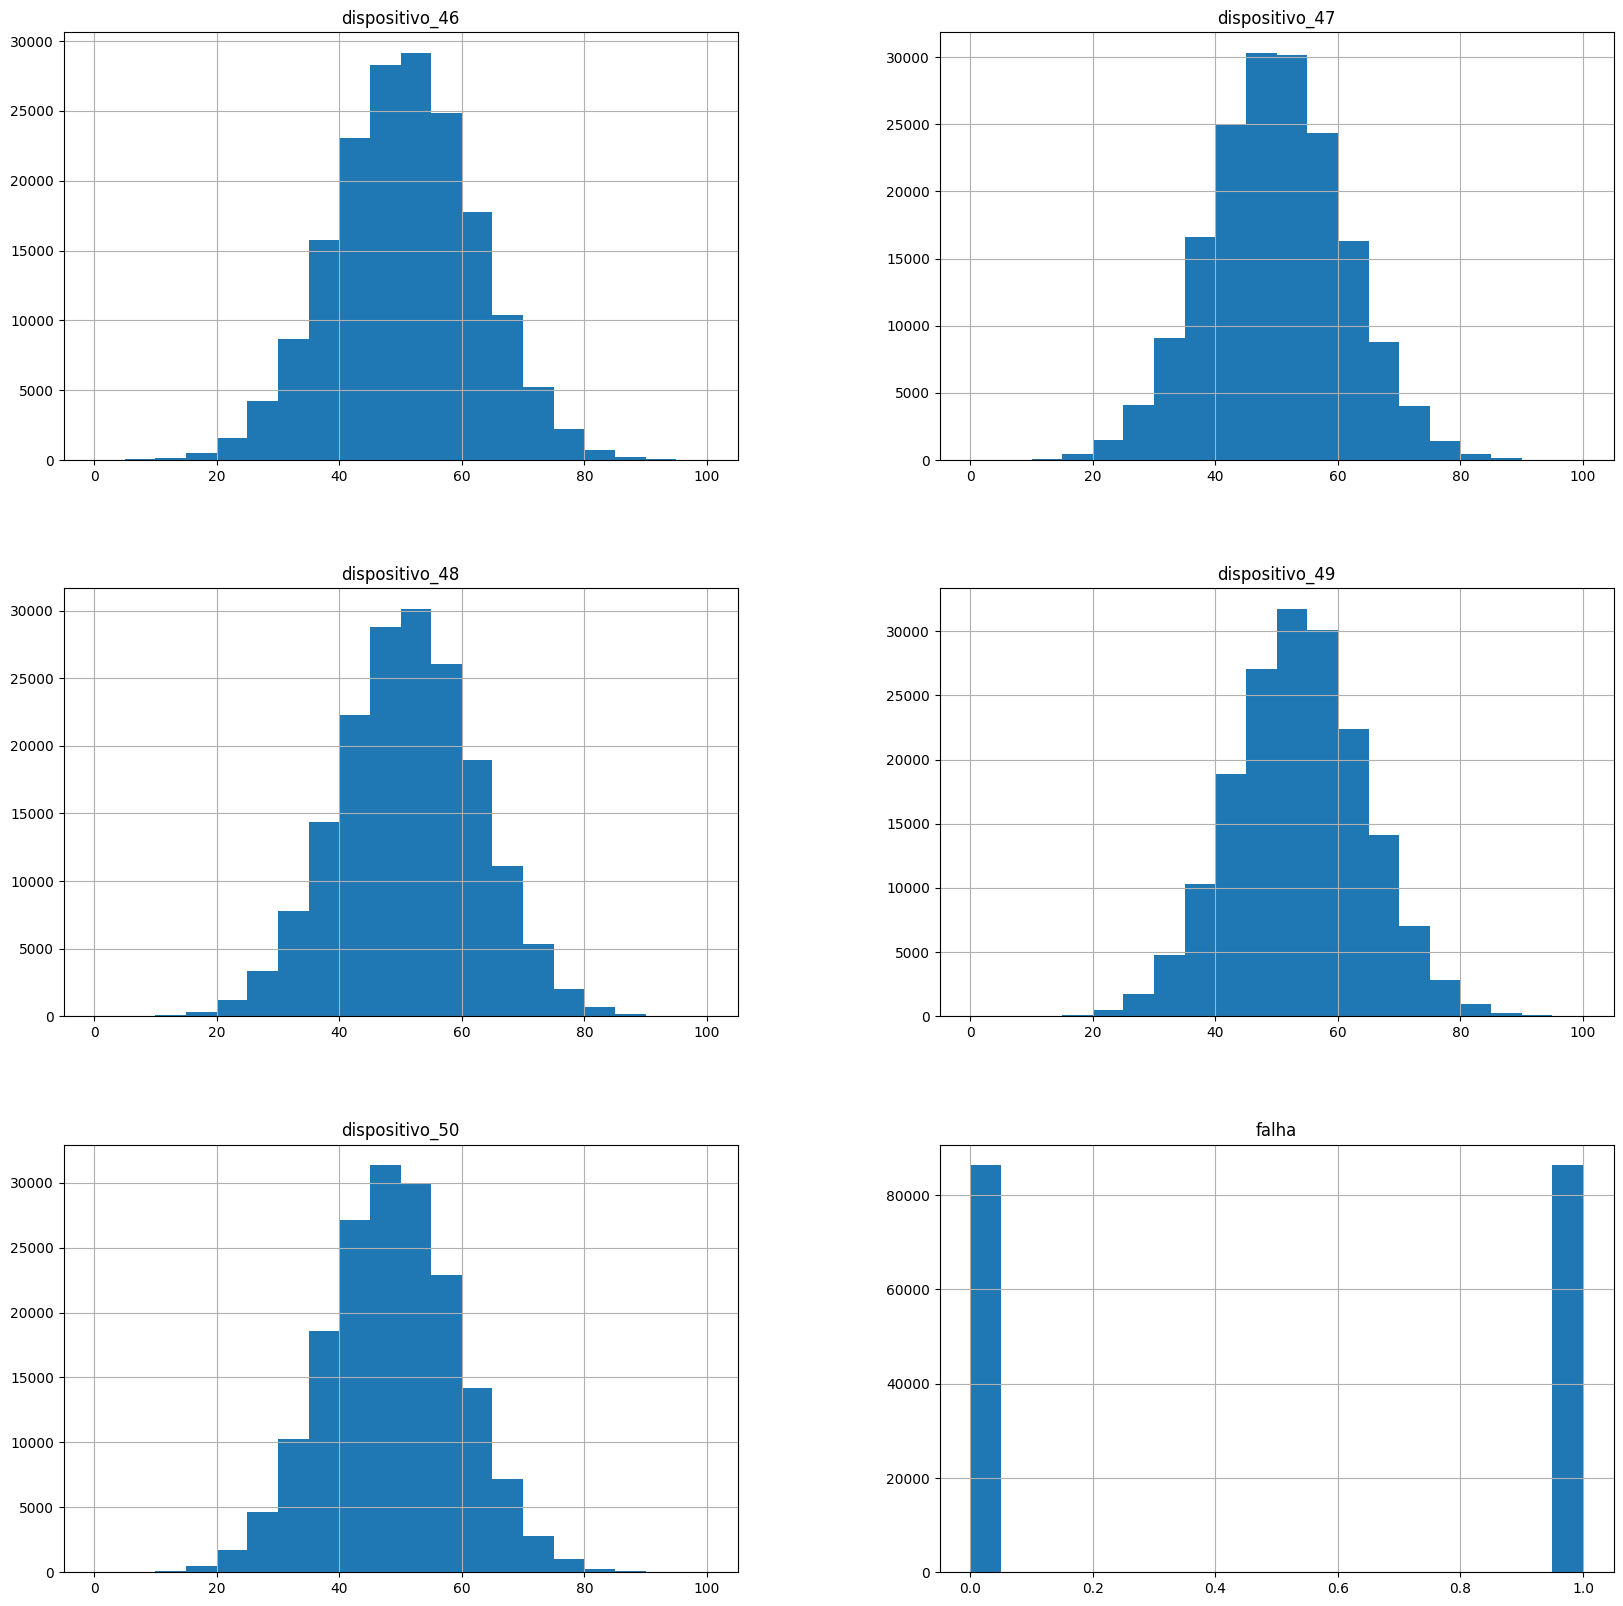

In [10]:
# Análise de histograma dos atributos
_ = df.hist(column=df.columns[45:], figsize=(20, 20), bins=20)

In [11]:
# Usando teste de distribuição normal por método numérico
from scipy.stats import jarque_bera

for col in df.columns:
    stat, p = jarque_bera(df[col])
    if p <= 0.05:
        print(f'{col}: stat={stat:.3f}, p={p:.3f}')

dispositivo_5: stat=605.128, p=0.000
dispositivo_18: stat=161.195, p=0.000
dispositivo_20: stat=795.070, p=0.000
dispositivo_22: stat=169.706, p=0.000
dispositivo_24: stat=3240.042, p=0.000
dispositivo_25: stat=168.139, p=0.000
dispositivo_28: stat=7.551, p=0.023
dispositivo_29: stat=6.640, p=0.036
dispositivo_34: stat=662.829, p=0.000
dispositivo_36: stat=2419.683, p=0.000
dispositivo_39: stat=27.417, p=0.000
dispositivo_40: stat=1320.841, p=0.000
dispositivo_41: stat=925.884, p=0.000
dispositivo_45: stat=314.522, p=0.000
falha: stat=28800.000, p=0.000


O método Jarque-Bera ou Shapiro-Wilk tem problemas de convergência para mais de 5.000 amostras.

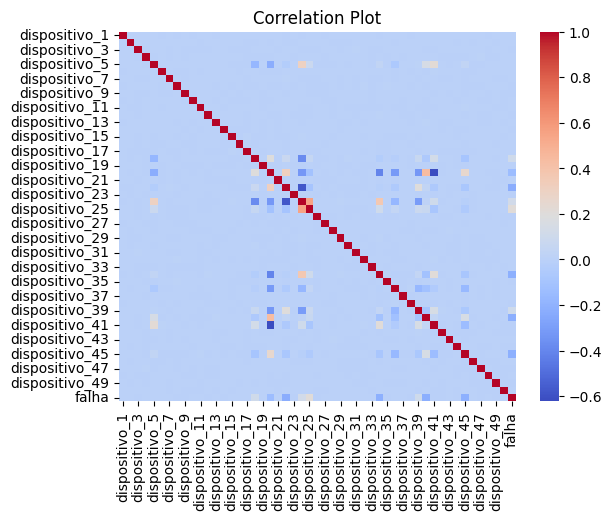

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Plot')
plt.show()


Na correlação não foram verificadas valores superiores a 70% de similaridade em nenhuma das colunas, garantindo que todas as colunas são informações únicas e necessárias para o aprendizado de máquina.

## Detecção de Anomalias

In [7]:
from sklearn.ensemble import IsolationForest
import numpy as np

anomalias = IsolationForest(random_state=42,contamination=0.2).fit_predict(df.values)

df['anomalias'] = anomalias

np.unique(anomalias, return_counts=True)

(array([-1,  1]), array([ 34560, 138240], dtype=int64))

In [9]:
final = df[df['anomalias'] == 1].drop(columns='anomalias')
final.to_csv('base_filtrada.csv', index=False)
display(final.describe().T)
final.head()

,count,mean,std,min,25%,50%,75%,max
dispositivo_1,138240.0,46.175490,10.895781,0.00,38.7800,46.230,53.51,94.56
dispositivo_2,138240.0,52.940634,11.570929,0.03,45.2200,53.000,60.78,99.85
dispositivo_3,138240.0,47.479876,10.157545,0.00,40.6400,47.480,54.31,100.00
dispositivo_4,138240.0,45.956120,10.027888,0.54,39.2000,45.980,52.75,89.99
dispositivo_5,138240.0,48.641710,10.345124,2.10,41.7300,48.930,55.74,100.00
dispositivo_6,138240.0,49.092588,10.880281,0.00,41.7500,49.090,56.41,100.00
dispositivo_7,138240.0,49.846998,10.501581,0.00,42.7400,49.880,57.01,96.39
dispositivo_8,138240.0,49.781320,11.010659,1.26,42.3475,49.770,57.18,97.21
dispositivo_9,138240.0,50.459695,11.384570,0.00,42.7700,50.470,58.20,100.00
dispositivo_10,138240.0,49.075617,10.424299,1.52,42.0300,49.110,56.10,100.00


,dispositivo_1,dispositivo_2,dispositivo_3,dispositivo_4,dispositivo_5,dispositivo_6,dispositivo_7,dispositivo_8,dispositivo_9,dispositivo_10,...,dispositivo_42,dispositivo_43,dispositivo_44,dispositivo_45,dispositivo_46,dispositivo_47,dispositivo_48,dispositivo_49,dispositivo_50,falha
1,48.70,36.58,42.64,51.02,66.17,43.68,51.84,57.06,40.92,33.10,...,42.58,45.03,55.41,56.54,34.13,50.11,49.88,49.82,69.11,0
2,45.65,69.17,48.58,34.39,42.41,41.61,59.15,55.03,59.03,59.72,...,74.03,48.05,39.78,58.47,63.05,54.80,68.53,45.07,71.07,0
3,63.11,49.81,38.17,59.98,61.59,59.39,48.50,55.62,52.20,30.47,...,43.08,47.89,32.30,66.46,54.78,60.01,21.40,53.12,50.01,0
4,28.41,38.22,43.15,39.12,58.32,71.58,36.61,45.84,35.68,45.38,...,58.20,55.04,36.48,52.88,54.85,66.86,50.58,58.64,53.66,0
5,64.94,49.23,63.78,54.09,53.86,66.00,36.42,23.26,46.84,57.69,...,55.68,57.47,42.40,49.21,52.69,66.94,55.73,38.38,38.92,1
